# Project 2: Ames Housing Data and Kaggle Challenge¶

## Problem Statement 

To create a sales home price prediction model for property agent so as to maximize their profit and efficiency in acquiring listing within Ames. And to give a true valuation for home owners as well. 

## Executive Summary

Through our research on the Ames Housing Data, we noticed that there are 3 neighborhood in Ames that are consistently selling at higher price compared to other neighborhood. The 3 neighborhoods are Stone Brook, Northridge, and Northridge Heights. And we also notice these neighborhoods tend to be residential property and are newly built in the year 2000. Therefore, agent can concentrate on these neighborhoods to maximize their commissions and efficiently source for listings within that vicinity. 

### Contents:
- [Ames Housing Data Import and Cleaning](#Ames-Housing-Data-Import-and-Cleaning)
- [Data dictionary Ames Housing Data](#Data-dictionary-Ames-Housing-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing & Feature Engineering](#Preprocessing-&-Feature-Engineering)
- [Linear Regression Model](#Linear-Regression-Model)
- [Optimal Value For Ridge Model ](#Optimal-Value-For-Ridge-Model )
- [Optimal Value For Lasso Model](#Optimal-Value-For-Lasso-Model)
- [Optimal Value for Elastic Net](#Optimal-Value-For-Elastic-Net)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)


# Ames Housing Data Import and Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV 
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

/Users/Wilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')


In [334]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [335]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
#CHANGE ALL COLUMNS NAME TO SMALL CAPS
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()


df_train.columns = df_train.columns.str.replace(' ', '_')
df_test.columns = df_test.columns.str.replace(' ', '_')


In [5]:
#No. of Null in each columns

none_col=df_train.isnull().sum()
mask_col=none_col>0
none_col[mask_col].sort_values(ascending=False)


pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64

In [6]:
# fill nan/empty cells with na

cols = ['pool_qc','misc_feature','alley','fence','fireplace_qu','garage_cond','garage_yr_blt','garage_qual','garage_finish',
        'garage_type','bsmt_exposure','bsmtfin_type_2','bsmt_cond','bsmt_qual','bsmtfin_type_1','mas_vnr_type','electrical']
for col in cols:
    df_train[col].replace(np.nan,'None',inplace=True)
    df_test[col].replace(np.nan,'None',inplace=True)
    

In [7]:
#fill nan/empty cells with 0.

cols = ['lot_frontage','mas_vnr_area','bsmt_half_bath','bsmt_full_bath','garage_cars','bsmtfin_sf_1','bsmtfin_sf_2',
       'bsmt_unf_sf','garage_area','total_bsmt_sf']
for col in cols:
    df_train[col].replace(np.nan,0,inplace=True)
    df_test[col].replace(np.nan,0,inplace=True)
    

In [8]:
#CHANGE ALL ROW TO SMALL CAPS

df_train = df_train.applymap(lambda s:s.lower() if type(s) == str else s)
df_test = df_test.applymap(lambda s:s.lower() if type(s) == str else s)


In [244]:
#Finding outliers

def outlier_observation(y):
    
    fig = plt.figure(figsize=(6,6))
    sns.lmplot(x='saleprice',y=y,data=df_train)  

<Figure size 432x432 with 0 Axes>

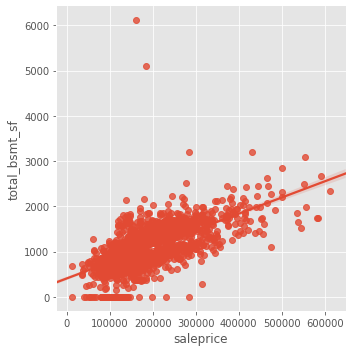

In [245]:
outlier_observation('total_bsmt_sf')

<Figure size 432x432 with 0 Axes>

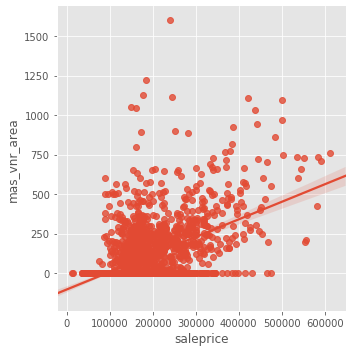

In [246]:
outlier_observation('mas_vnr_area')

<Figure size 432x432 with 0 Axes>

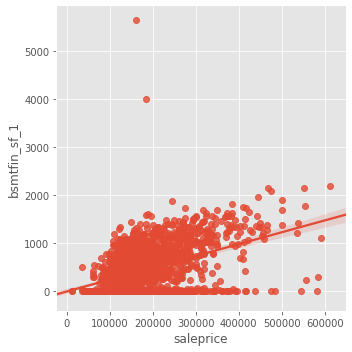

In [247]:
outlier_observation('bsmtfin_sf_1')

<Figure size 432x432 with 0 Axes>

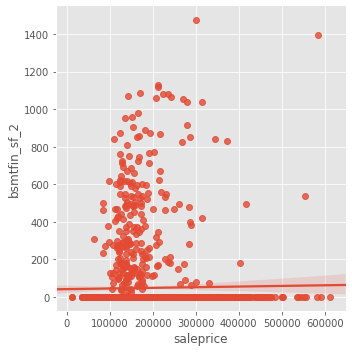

In [248]:
outlier_observation('bsmtfin_sf_2')

<Figure size 432x432 with 0 Axes>

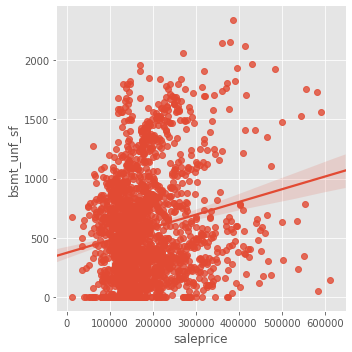

In [249]:
outlier_observation('bsmt_unf_sf')

<Figure size 432x432 with 0 Axes>

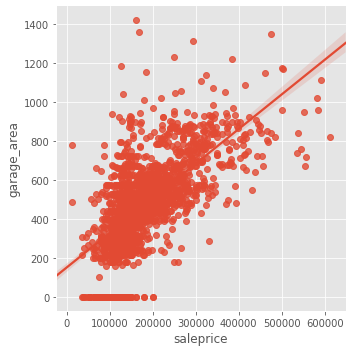

In [250]:
outlier_observation('garage_area')

<Figure size 432x432 with 0 Axes>

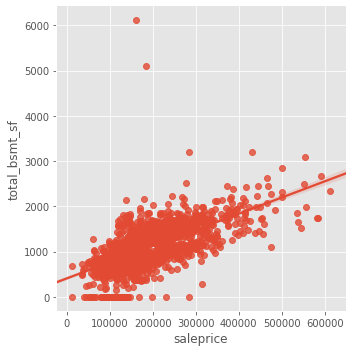

In [251]:
outlier_observation('total_bsmt_sf')

Most of the observed features have a valid outlier as their dimension match with other variables in the data. Thus, I would retain those outlier as I feel it will provide some form of data to the neighborhood in Ames. 

## Data dictionary Ames Housing Data

|Feature      |Type      |Dataset  |Description|
|---------    |------    |---------|-----------|
|**id**        |int    |train/test  |ID|
|**pid**        |int    |train/test  |Postal Identification |
|**ms_subclass** |int    |train/test  |Building class|
|**ms_zoning**    |object    |train/test  |General zoning classification|
|**lot_frontage**        |float    |train/test  |Linear feet of street connected to property|
|**lot_area**        |int    |train/test  |Lot size in square feet|
|**street**        |object    |train/test  |Type of road access to property|
|**alley**        |object    |train/test  |Type of alley access to property|
|**lot_shape**        |object   |train/test  |General shape of property|
|**land_contour**        |object    |train/test  |Flatness of the property|
|**utilities**        |object   |train/test  |Type of utilities available|
|**lot_config**        |object    |train/test  |Lot configuration|
|**land_slope**        |object    |train/test  |Slope of property|
|**neighborhood**        |object    |train/test  |Physical locations within Ames city limits|
|**condition_1**        |object    |train/test  | Proximity to main road or railroad|
|**condition_2**        |object    |train/test  |Proximity to main road or railroad (if a second is present)|
|**bldg_type**        |object    |train/test  |Type of dwelling|
|**house_style**        |object    |train/test  |Style of dwelling|
|**overall_qual**        |int    |train/test  |Overall material and finish quality|
|**overall_cond**        |int    |train/test  |Overall condition rating|
|**year_built**        |int    |train/test  | Original construction date|
|**year_remod/add**        |int    |train/test  |Remodel date|
|**roof_style**        |object    |train/test  |Type of roof|
|**roof_matl**        |object    |train/test  |Roof material|
|**exterior_1st**        |object    |train/test  |Exterior covering on house|
|**exterior_2nd**        |object    |train/test  |Exterior covering on house|
|**mas_vnr_type**        |object    |train/test  |Masonry veneer type|
|**mas_vnr_area**        |float    |train/test  |Masonry veneer area in square feet|
|**exter_qual**        |object    |train/test  |Exterior material quality|
|**exter_cond**        |object    |train/test  |Present condition of the material on the exterior|
|**foundation**        |object    |train/test  |Type of foundation|
|**bsmt_qual**        |object    |train/test  |Height of the basement|
|**bsmt_cond**        |object    |train/test  |General condition of the basement|
|**bsmt_exposure**        |object    |train/test  |Walkout or garden level basement walls|
|**bsmtfin_type_1**        |object    |train/test  |Quality of basement finished area|
|**bsmtfin_sf_1**        |float    |train/test  |Type 1 finished square feet|
|**bsmtfin_type_2**        |object    |train/test  |Quality of second finished area|
|**bsmtfin_sf_2**        |float    |train/test  |Type 2 finished square feet|
|**bsmt_unf_sf**        |float    |train/test  |Unfinished square feet of basement area|
|**total_bsmt_sf**        |float    |train/test  |Total square feet of basement area|
|**heating**        |object    |train/test  |Type of heating|
|**heating_qc**        |object    |train/test  |Heating quality and condition|
|**central_air**        |object    |train/test  |Central air conditioning|
|**electrical**        |object    |train/test  |Electrical system|
|**1st_flr_sf**        |int    |train/test  |First Floor square feet|
|**2nd_flr_sf**        |int    |train/test  |Second floor square feet|
|**low_qual_fin_sf**        |int    |train/test  |Low quality finished square feet |
|**gr_liv_area**        |int    |train/test  |Above grade (ground) living area square feet|
|**bsmt_full_bath**        |float    |train/test  |Basement full bathrooms|
|**bsmt_half_bath**        |float    |train/test  |Basement half bathrooms|
|**full_bath**        |int    |train/test  |Full bathrooms above grade|
|**half_bath**        |int    |train/test  |Half baths above grade|
|**bedroom_abvgr**        |int    |train/test  |Number of bedrooms above basement level|
|**kitchen_abvgr**        |int    |train/test  |Number of kitchens|
|**kitchen_qual**        |object    |train/test  |Kitchen quality|
|**totrms_abvgrd**        |int    |train/test  |Total rooms above grade|
|**functional**        |object    |train/test  |Home functionality rating|
|**fireplaces**        |int    |train/test  |Number of fireplaces|
|**fireplace_qu**        |object    |train/test  |Fireplace quality|
|**garage_type**        |object   |train/test  |Garage location|
|**garage_yr_blt**        |object    |train/test  |Year garage was built|
|**garage_finish**        |object    |train/test  |Interior finish of the garage|
|**garage_cars**        |float    |train/test  |Size of garage in car capacity|
|**garage_area**        |float    |train/test  |Size of garage in square feet|
|**garage_qual**        |object   |train/test  |Garage quality|
|**garage_cond**        |object    |train/test  |Garage condition|
|**paved_drive**        |object    |train/test  |Paved driveway|
|**wood_deck_sf**        |int    |train/test  |Wood deck area in square feet|
|**open_porch_sf**        |int    |train/test  |Open porch area in square feet|
|**3ssn_porch**        |int    |train/test  |Three season porch area in square feet|
|**screen_porch**        |int    |train/test  |Screen porch area in square feet|
|**pool_area**        |int    |train/test  |Pool area in square feet|
|**pool_qc**        |object    |train/test  |Pool quality|
|**fence**        |object    |train/test  |Fence quality|
|**misc_feature**        |object    |train/test  |Miscellaneous feature not covered in other categories|
|**misc_val**        |int    |train/test  |Value of miscellaneous feature|
|**mo_sold**        |int    |train/test  |Month Sold|
|**yr_sold**        |int    |train/test  |Year Sold|
|**saleprice**        |int    |train/test  |property's sale price in dollars|
















## Exploratory Data Analysis

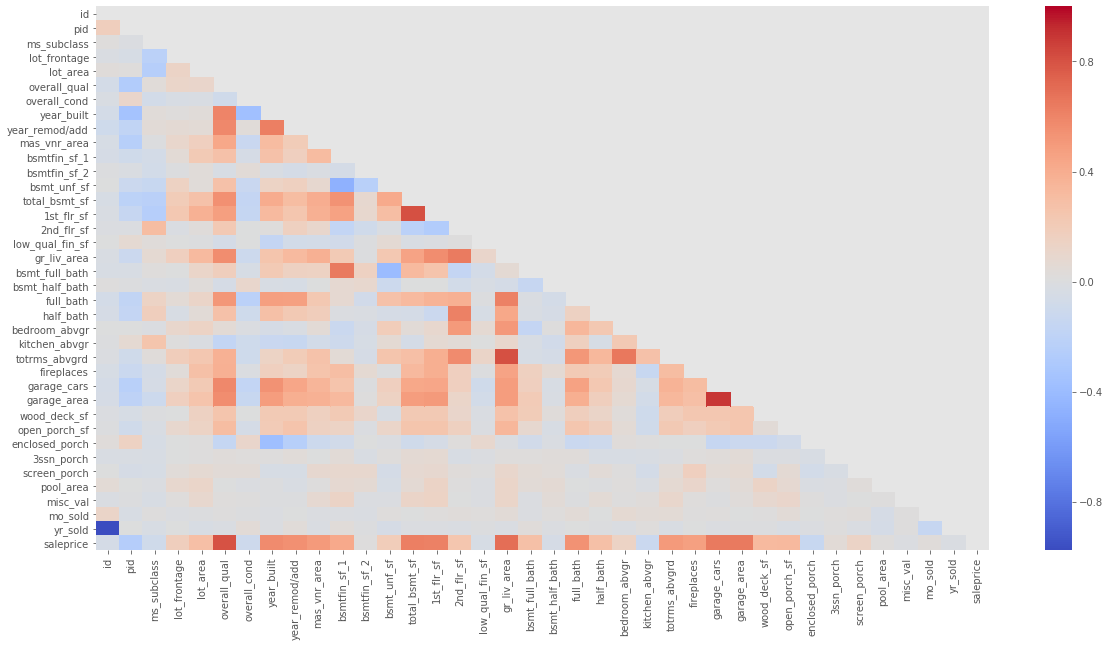

In [254]:
#SELECTING FEATURES
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_train.corr(),
            cmap='coolwarm',
            mask = mask);



In [255]:
#Understanding of the correlation matrix based on their positions.
df_corr = df_train.corr()
df_corr['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.649897
garage_cars        0.647781
total_bsmt_sf      0.629303
1st_flr_sf         0.618486
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
totrms_abvgrd      0.504014
mas_vnr_area       0.503579
fireplaces         0.471093
bsmtfin_sf_1       0.423856
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283332
half_bath          0.283001
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190861
lot_frontage       0.181456
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016432
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045290
id                -0.051398
ms_subclass       -0.087335
overall_cond      -0.097019
kitchen_abvgr     -0

In [324]:
#Function to plot scatter
def plotscatter(xaxis,cat):
    plt.figure(figsize=(25,20))

    sns.lmplot(x=xaxis,
              y='saleprice',
              data=df_train,
              fit_reg=False,
              hue=cat)
    

In [325]:
#Function to plot violinplot with swarmplot
def plotviolin(xaxis,cat):
    plt.figure(figsize=(15,15))

    sns.violinplot(x=xaxis,
                  y='saleprice',
                  data = df_train,
                  inner=None)

    sns.swarmplot(x=xaxis,
                  y='saleprice',
                  data = df_train,
                 hue =cat
                 )

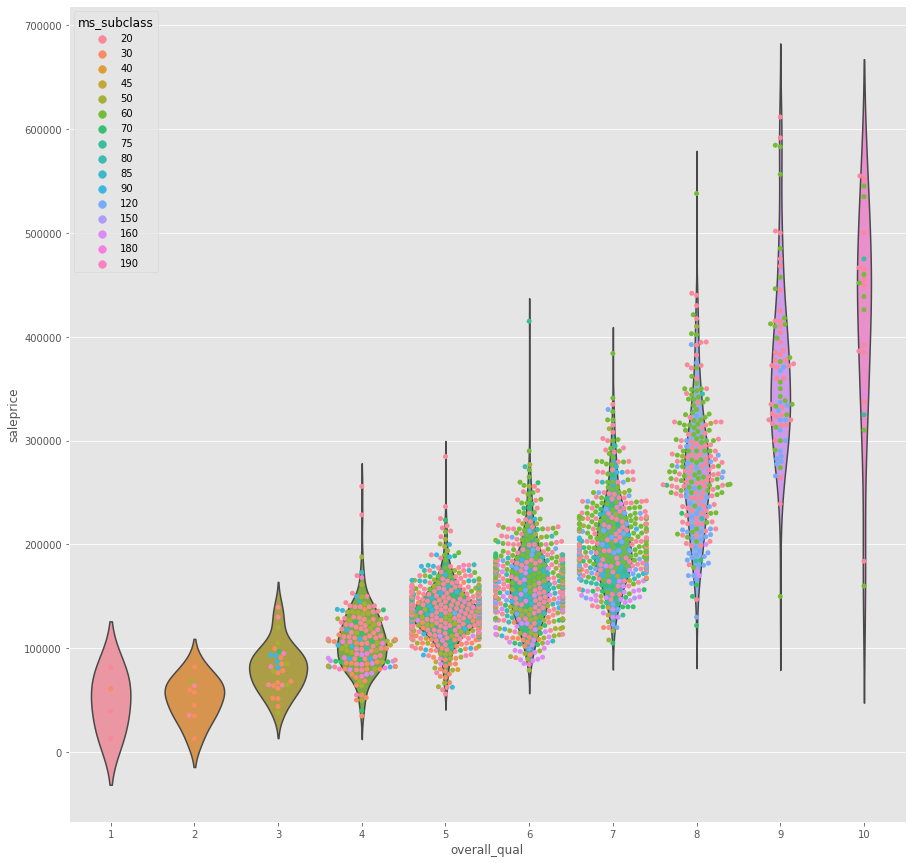

In [258]:
#SALE PRICE VS OVERALL_QUAL

plotviolin('overall_qual','ms_subclass')

Property with overall higher quality are able to sell their property at a higher sale price. 

<Figure size 1800x1440 with 0 Axes>

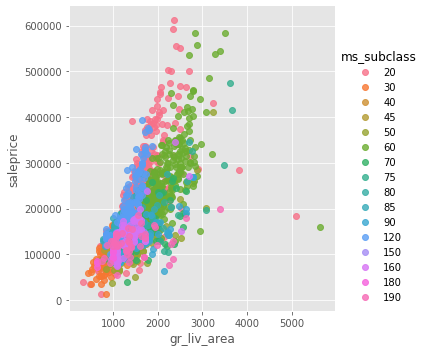

In [259]:
#SALE PRICE VS GR_LIV_AREA

plotscatter('gr_liv_area','ms_subclass')

Property with a larger ground living area tend to be able to sell at a higher sale price. 

<Figure size 1800x1440 with 0 Axes>

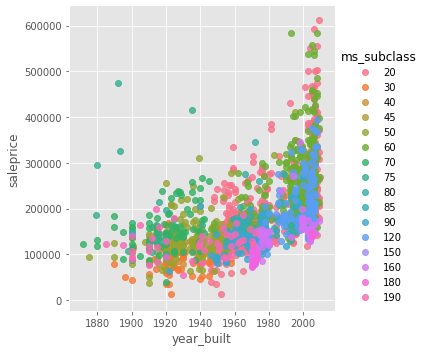

In [260]:
# SALE PRICE VS YEAR_BUILT
    
plotscatter('year_built','ms_subclass')

Property that are built after year 2000s are able to fetch a higher sale price compared to other buildings that are built before that. 

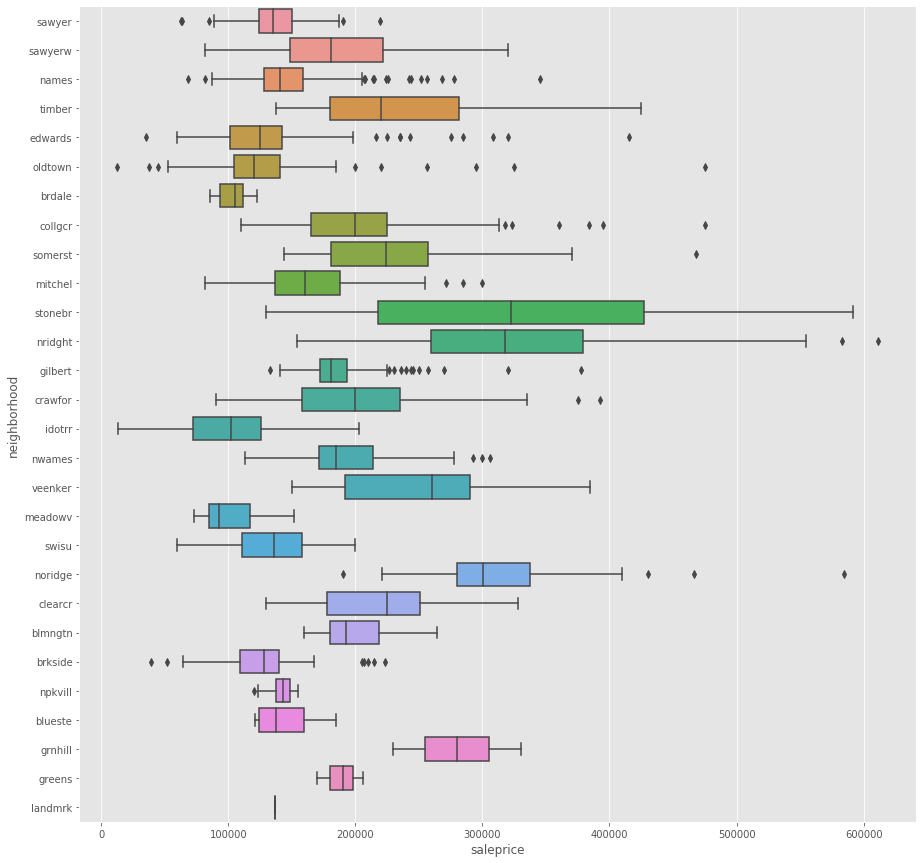

In [261]:
#SALE PRICE VS NEIGHBORHOOD

plt.figure(figsize=(15,15))

sns.boxplot(x='saleprice',
                y='neighborhood',
                data = df_train,
                )


Stone Brook, Northridge, and Northridge Heights are 3 of the most attractive neighborhood with higher sale prices. 

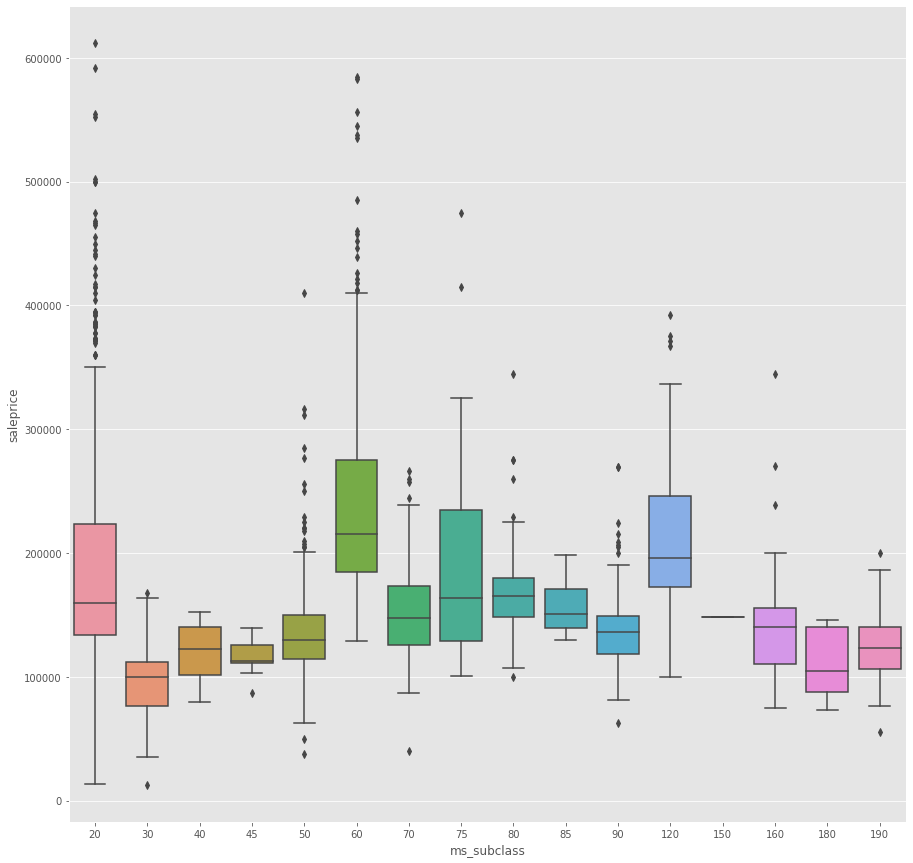

In [262]:
#SALE PRICE VS MS_SUBCLASS

plt.figure(figsize=(15,15))

sns.boxplot(x='ms_subclass',
                y='saleprice',
                data = df_train,
                )

Ms_subclass 60, 75, and 120 which are 2-story 1946 & newer, 2-1/2 story all ages, and 1-story PUD (Planned Unit Development) - 1946 & newer respectively, have a higher sale price compared to other classes. 

## Preprocessing & Feature Engineering

In [9]:
# the columns below are omitted infeature matrix (reasons given):

#id, pid (Not important)
#alley,pool-qc,fence,misc_feature (Do not affect correlates much to sales price and contains lots of na values.)

#Feature Matrix
df_train_copy1 = df_train.copy() #ALLOWS ME TO KEEP MY ORIGINAL TRAIN AND TEST DATA
df_test_copy1 = df_test.copy()



df_train_copy1 = df_train_copy1.drop(['id','pid','alley','pool_qc','fence','misc_feature','garage_yr_blt'],axis=1)

df_test_copy1 = df_test_copy1.drop(['id','pid','alley','pool_qc','fence','misc_feature','garage_yr_blt'],axis=1)



In [10]:
#Further feature engineering

#Some columns can be combined to form one category

df_train_copy1['total_baths'] = df_train_copy1['bsmt_full_bath'] + 0.5*df_train_copy1['bsmt_half_bath']+ df_train_copy1['full_bath'] + 0.5*df_train_copy1['half_bath'] 
df_test_copy1['total_baths'] = df_test_copy1['bsmt_full_bath'] + 0.5*df_test_copy1['bsmt_half_bath'] + df_test_copy1['full_bath'] + 0.5*df_test_copy1['half_bath']


df_train_copy1['total_outdoor'] = df_train_copy1['wood_deck_sf'] + df_train_copy1['enclosed_porch'] + df_train_copy1['3ssn_porch'] + df_train_copy1['open_porch_sf'] + df_train_copy1['screen_porch']
df_test_copy1['total_outdoor'] = df_test_copy1['wood_deck_sf'] + df_test_copy1['enclosed_porch'] + df_test_copy1['3ssn_porch'] + df_test_copy1['open_porch_sf'] + df_test_copy1['screen_porch']


In [11]:
#Remove all the columns that I combined
bath = ['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath']
outdoor = ['wood_deck_sf', 'enclosed_porch', '3ssn_porch', 'open_porch_sf', 'screen_porch']

df_train_copy1.drop(bath + outdoor, axis=1, inplace=True)
df_test_copy1.drop(bath + outdoor, axis=1, inplace=True)

In [12]:
#Using total basement size as the final column we will remove all the individual similar columns

bsmt = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'low_qual_fin_sf']

df_train_copy1.drop(bsmt, axis=1, inplace=True)
df_test_copy1.drop(bsmt, axis=1, inplace=True)

In [13]:
#Removing columns which have majority counts towards certain category. 

#Kitchen

df_train_copy1.kitchen_abvgr.value_counts()


1    1960
2      88
0       2
3       1
Name: kitchen_abvgr, dtype: int64

In [14]:
df_train_copy1.drop('kitchen_abvgr', 1, inplace=True)
df_test_copy1.drop('kitchen_abvgr', 1, inplace=True)

In [15]:
#Fireplace
#Changing it's variable to just having a fireplace or not 

df_train_copy1.fireplaces.value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

In [16]:
df_train_copy1['fireplaces'] = df_train_copy1['fireplaces'].map({0: 0, 1:1, 2:1, 3:1, 4:1})
df_test_copy1['fireplaces'] = df_test_copy1['fireplaces'].map({0: 0, 1:1, 2:1, 3:1, 4:1})

In [17]:
df_train_copy1.fireplaces.value_counts()

1    1051
0    1000
Name: fireplaces, dtype: int64

In [18]:
#Street 
#As most people stay near the pave we will remove the street column

df_train_copy1.street.value_counts()

pave    2044
grvl       7
Name: street, dtype: int64

In [19]:
df_train_copy1.drop('street', axis=1, inplace=True)
df_test_copy1.drop('street', axis=1, inplace=True)

In [20]:
#Pool
#Only a small number of people have swimming pool thus, I am dropping Pool.

df_train_copy1.drop(['pool_area'], axis=1, inplace=True)
df_test_copy1.drop(['pool_area'], axis=1, inplace=True)


In [21]:
#Utilities

df_train_copy1['utilities'].value_counts()


allpub    2049
nosewr       1
nosewa       1
Name: utilities, dtype: int64

In [22]:

df_train_copy1.drop('utilities', axis=1, inplace=True)
df_test_copy1.drop('utilities', axis=1, inplace=True)

In [23]:
#Dummies
to_be_dummies = df_train_copy1.select_dtypes(include='object').columns

df_train_copy1 = pd.get_dummies(df_train_copy1, columns=to_be_dummies)

In [24]:
to_be_dummies = df_test_copy1.select_dtypes(include='object').columns

df_test_copy1 = pd.get_dummies(df_test_copy1, columns=to_be_dummies)

In [25]:
#Further reducing columns which shows majority selection on certain category. 

col = ['misc_val','bsmt_cond_ex','bsmt_cond_po','condition_2_artery','condition_2_rrae','condition_2_rrnn',
      'electrical_mix','exterior_1st_cblock','exterior_1st_imstucc','exterior_1st_stone','exterior_2nd_stone',
      'functional_sal','functional_sev','garage_qual_ex','heating_othw','heating_qc_po','heating_wall',
       'ms_zoning_a (agr)','neighborhood_grnhill','neighborhood_landmrk','roof_matl_clytile','roof_matl_membran',
       'condition_2_rran' 
      ]
df_train_copy1 = df_train_copy1.drop(col,axis=1)


In [26]:
col = ['electrical_none','exterior_1st_precast','exterior_2nd_other','exterior_2nd_precast','heating_floor',
       'kitchen_qual_po','mas_vnr_type_cblock','misc_val','roof_matl_metal','roof_matl_roll','sale_type_vwd']
df_test_copy1 = df_test_copy1.drop(col,axis=1)

## Linear Regression Model

In [281]:
#Linear Regression

X = df_train_copy1.drop('saleprice',axis=1)
y = df_train_copy1['saleprice']

In [282]:
lr = LinearRegression()

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [284]:
ss = StandardScaler()
X_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)


In [285]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9105882995869345, 0.8967884015523546)

In [287]:
np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

24838.27276086758

The result shows acceptable R2 score however, have to be compared with Ridge and Lasso. 

In [288]:
#Kaggle submission
X_kaggle = df_test_copy1.values

xs = ss.transform(X_kaggle)

pred_lr = lr.predict(xs)

pred_lr

#Create a cv file for submission
df_lr = pd.DataFrame(df_test,columns=['id'])
df_lr['SalePrice'] = pred_lr
df_lr.sort_values(by='id',inplace=True)

df_lr.to_csv(r'df_lr.csv',index=False)

## Optimal Value For Ridge Model 



In [289]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_scale, y_train)

print(optimal_ridge.alpha_)

615.0985788580505


In [290]:
#BASED ON TRAIN SET
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_scale, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.88985153 0.85172284 0.86661598 0.85248144 0.8813818  0.92236544
 0.92687495 0.77126269 0.72614843 0.89684229]
0.8585547389652814


In [291]:
#BASED ON TEST SET
ridge_scores = cross_val_score(ridge, X_test_scale, y_test, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.90312561 0.78966226 0.87825852 0.919024   0.91682812 0.91684601
 0.858401   0.89687569 0.89366048 0.91752542]
0.8890207095795329


In [292]:
#Refit it outside of that function to pull out the coefficients.
ridge.fit(X_scale,y_train);

In [293]:
np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scale)))

24952.251574181842

The Ridge model had a lower R2 score and higher RMSE when compared to above Linear model thus, it could mean it is not as accurate as the Linear model. 

In [294]:
#Kaggle Submmission
pred_ridge = ridge.predict(xs)

#Create a cv file for submission
df_ridge = pd.DataFrame(df_test,columns=['id'])
df_ridge['SalePrice'] = pred_ridge
df_ridge.sort_values(by='id',inplace=True)


df_ridge.to_csv(r'df_ridge.csv',index=False)

In [295]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

bar_y = ridge_coefs.variable.head(20)
bar_x = ridge_coefs.coef.head(20)

In [296]:
ridge_coefs.head(10)

,variable,coef,abs_coef
3,overall_qual,6866.309120,6866.309120
192,kitchen_qual_ex,5705.695998,5705.695998
11,gr_liv_area,5509.785770,5509.785770
65,neighborhood_stonebr,5317.330388,5317.330388
59,neighborhood_nridght,5274.358616,5274.358616
19,total_baths,5087.471384,5087.471384
135,exter_qual_ex,5040.589454,5040.589454
57,neighborhood_noridge,4293.097964,4293.097964
150,bsmt_qual_ex,4282.595912,4282.595912
13,totrms_abvgrd,3943.533692,3943.533692


In [297]:
ridge_coefs.tail(10)

,variable,coef,abs_coef
143,exter_cond_ta,-26.093609,26.093609
52,neighborhood_greens,23.585681,23.585681
79,condition_2_norm,15.709580,15.709580
148,foundation_stone,-15.706981,15.706981
191,electrical_sbrkr,-8.838310,8.838310
38,lot_config_fr3,6.423140,6.423140
175,bsmtfin_type_2_lwq,6.238954,6.238954
122,exterior_2nd_cmentbd,-4.417568,4.417568
106,exterior_1st_asphshn,0.000000,0.000000
23,ms_zoning_i (all),0.000000,0.000000


<BarContainer object of 20 artists>

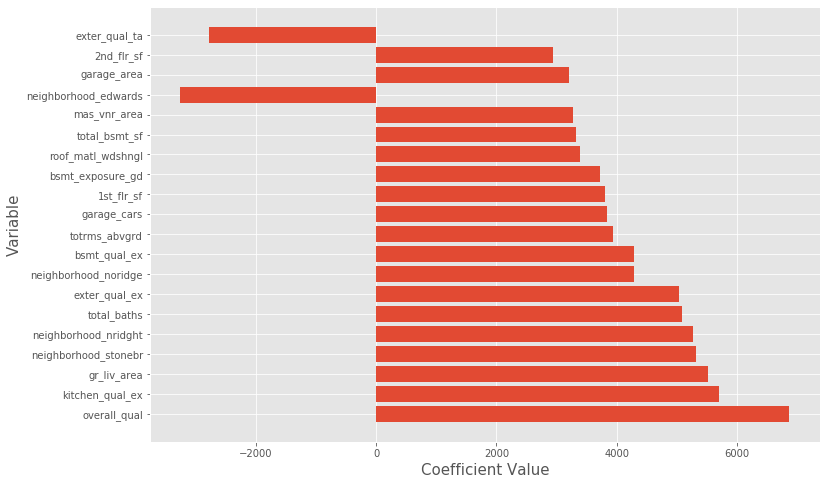

In [298]:
fig = plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.xlabel('Coefficient Value', size=15)
plt.ylabel('Variable', size=15)


plt.barh(bar_y,bar_x)

A indication of the most significant coefficient within the Ridge model. 

## Optimal Value For Lasso Model

In [299]:
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_scale, y_train)

print(optimal_lasso.alpha_)

748.0742096061823


In [300]:
#BASED ON TRAIN SET
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_scale, y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.9041347  0.8393913  0.87234956 0.85274497 0.88041941 0.92949828
 0.93011451 0.75641571 0.6825563  0.88742601]
0.853505076047847


In [301]:
#BASED ON TEST SET
lasso_scores = cross_val_score(lasso, X_test_scale, y_test, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.92242154 0.88274832 0.90455648 0.93476193 0.93974199 0.93507757
 0.87998471 0.92401157 0.91268723 0.91798833]
0.9153979654828465


In [302]:
#Refit it outside of that function to pull out the coefficients.
lasso.fit(X_scale,y_train);

In [303]:
np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scale)))

24248.550391722307

The R2 score for Lasso model is higher compared to the other 2 model. And it has a better result in RMSE as well. 

In [304]:
#Kaggle Submmission
pred_lasso = lasso.predict(xs)
pred_lasso

#Create a cv file for submission
df_lasso = pd.DataFrame(df_test,columns=['id'])
df_lasso['SalePrice'] = pred_lasso
df_lasso.sort_values(by='id',inplace=True)


df_lasso.to_csv(r'df_lasso.csv',index=False)

In [305]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

bar_y = lasso_coefs.variable.head(20)
bar_x = lasso_coefs.coef.head(20)

In [306]:
lasso_coefs.head(20)

,variable,coef,abs_coef
11,gr_liv_area,14032.267337,14032.267337
3,overall_qual,13188.139830,13188.139830
59,neighborhood_nridght,8225.846310,8225.846310
19,total_baths,7874.291110,7874.291110
65,neighborhood_stonebr,7605.369290,7605.369290
192,kitchen_qual_ex,6480.221962,6480.221962
57,neighborhood_noridge,5899.896416,5899.896416
135,exter_qual_ex,5472.084454,5472.084454
161,bsmt_exposure_gd,5440.687200,5440.687200
15,garage_cars,5103.751865,5103.751865


<BarContainer object of 20 artists>

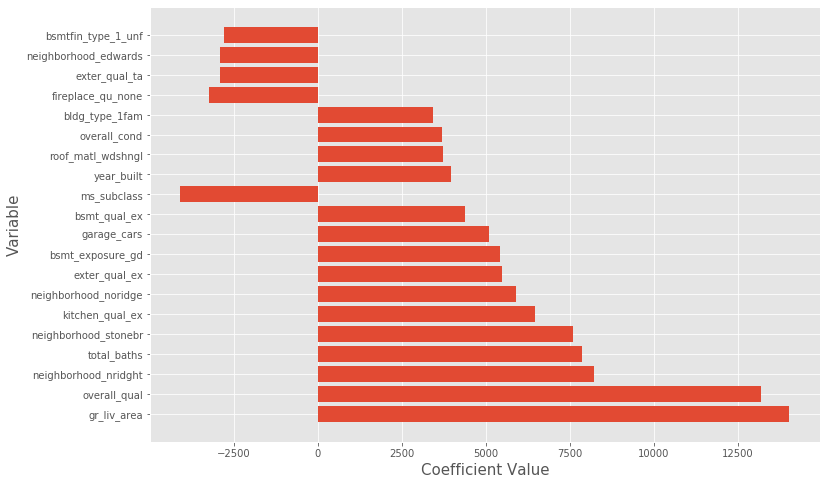

In [307]:
fig = plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.xlabel('Coefficient Value', size=15)
plt.ylabel('Variable', size=15)


plt.barh(bar_y,bar_x)

An indication of the most significant coefficient within the Lasso model. 

## Compare the residuals for the Ridge and Lasso visually.

In [308]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score

ridge.fit(X_scale, y_train);
lasso.fit(X_scale, y_train);

In [309]:
# model residuals:
ridge_resid = y_test - ridge.predict(X_test_scale)
lasso_resid = y_test - lasso.predict(X_test_scale)


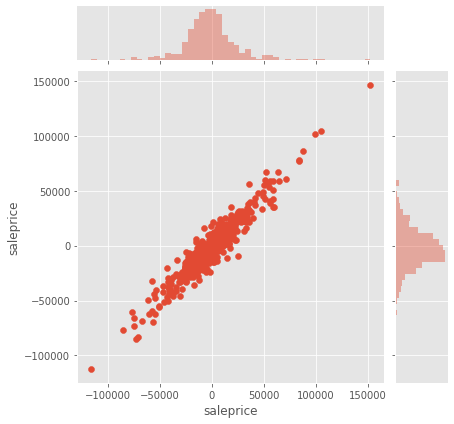

In [310]:
#Residuals plot
sns.jointplot(ridge_resid, lasso_resid);

The variance within the two model is relatively low however, bias is still high. 

## Optimal Value for Elastic Net

In [311]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            )
optimal_enet.fit(X_scale, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

731.8304277275763
1.0


In [312]:
#BASED ON TRAIN SET
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_scale, y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.90421047 0.83921535 0.87227237 0.85260594 0.88048694 0.9292727
 0.93019579 0.75634038 0.68306489 0.88711889]
0.8534783706765043


In [313]:
#BASED ON TEST SET
enet_scores = cross_val_score(enet, X_test_scale, y_test, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

#Basically it is using Lasso regularization

[0.92223277 0.88296204 0.90460204 0.93453201 0.93986625 0.9349835
 0.88000775 0.92388162 0.91271153 0.91787525]
0.9153654753005535


In [314]:
optimal_enet.fit(X_scale, y_train);

In [315]:
np.sqrt(mean_squared_error(y_test, optimal_enet.predict(X_test_scale)))

24262.364400666167

The Elastic Net model parameters are more inclined towards Lasso model thus, the result of R2 and RMSE are relatively similar to Lasso model. Therefore, the Lasso model is chosen as the final model to work on. 

In [316]:
#Kaggle Submission
pred_enet = optimal_enet.predict(xs)

#Create a cv file for submission
df_enet = pd.DataFrame(df_test,columns=['id'])
df_enet['SalePrice'] = pred_enet
df_enet.sort_values(by='id',inplace=True)

df_enet

df_enet.to_csv(r'df_enet.csv',index=False)

In [317]:
enet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':optimal_enet.coef_,
                            'abs_coef':np.abs(optimal_enet.coef_)})

enet_coefs.sort_values('abs_coef', inplace=True, ascending=False)

bar_y = enet_coefs.variable.head(20)
bar_x = enet_coefs.coef.head(20)

<BarContainer object of 20 artists>

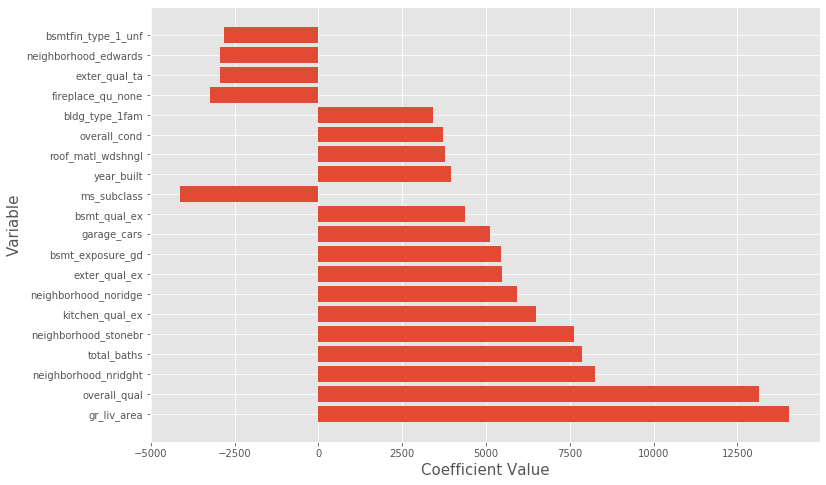

In [318]:
fig = plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.xlabel('Coefficient Value', size=15)
plt.ylabel('Variable', size=15)


plt.barh(bar_y,bar_x)

Since the Lasso model was preferred within the Elastic Net model the most significant coefficient within the Elastic Net model are identical to the Lasso model. 

## Descriptive and Inferential Statistics

In [35]:
#Top 3 neighborhood

# create df_neighbor to review top 3 neighbourhoods vs the rest
cols = ['overall_qual','saleprice','neighborhood','gr_liv_area','year_built','garage_cars']
df_neighbor = df_train[cols]
df_neighbor['overall_qual'] = pd.to_numeric(df_neighbor['overall_qual'])
df_neighbor = df_neighbor.sort_values(by='overall_qual')


/Users/Wilson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
# rename remaining neighbourhoods to others
tgt_neighborhood = ['stonebr','noridge','nridght']
mask_neighbor = df_neighbor['neighborhood'].isin(tgt_neighborhood)
df_neighbor['neighborhood'][~mask_neighbor] = 'others'

/Users/Wilson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


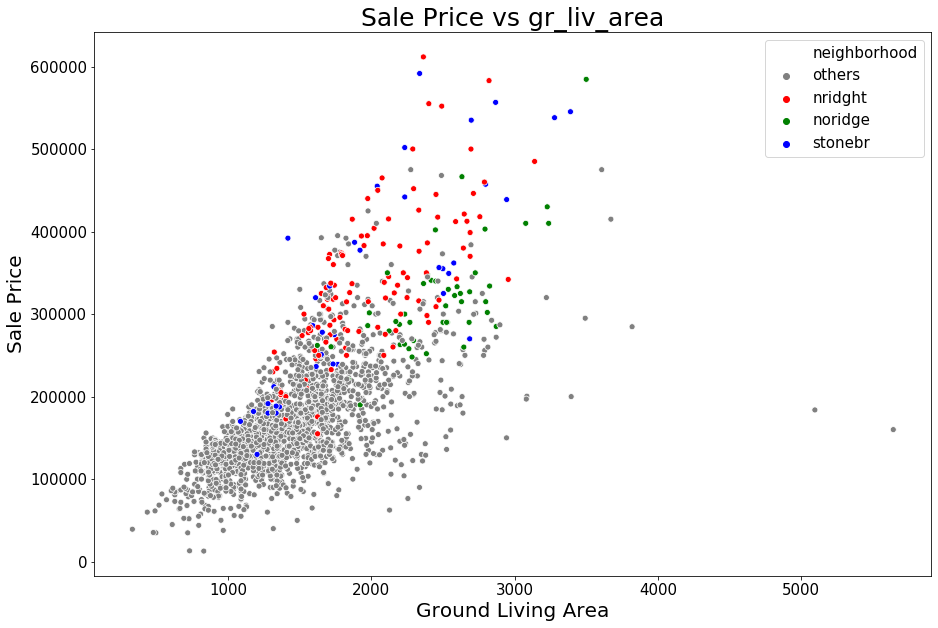

In [37]:
# scatterplot 1

color_dict = dict({
    
    'stonebr':'blue',
    'noridge':'green',
    'nridght': 'red',
    'others': 'grey',
})

plt.figure(figsize=(15,10))

sns.scatterplot(data=df_neighbor,x='gr_liv_area',y='saleprice',hue='neighborhood',palette=color_dict)

plt.title('Sale Price vs gr_liv_area',fontsize=25)
plt.xlabel('Ground Living Area',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15);

Stone Brook, Northridge Heights and Northridge neighbourhoods have the highest sale prices (from EDA conducted earlier).
The scatterplot above compares the top 3 neighbourhoods against the rest.
The plot shows these neighbourhoods generally has higher floor area (Ground Total Area) and higher sale prices.

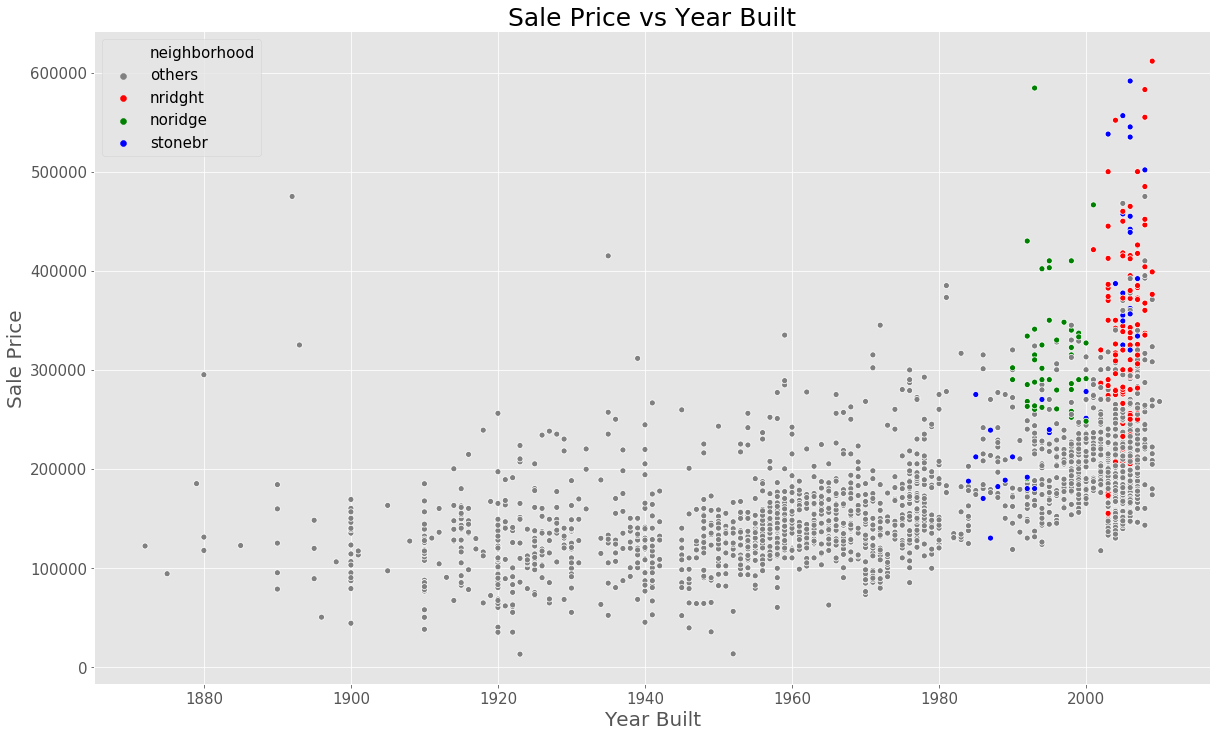

In [322]:
# scatterplot 2
plt.figure(figsize=(20,12))
sns.scatterplot(data=df_neighbor,x='year_built',y='saleprice',hue='neighborhood',palette=color_dict)

plt.title('Sale Price vs Year Built',fontsize=25)
plt.xlabel('Year Built',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15);

The scatterplot above shows houses sold, in the top 3 neighbourhood, are newer compared to other neighbourhoods.


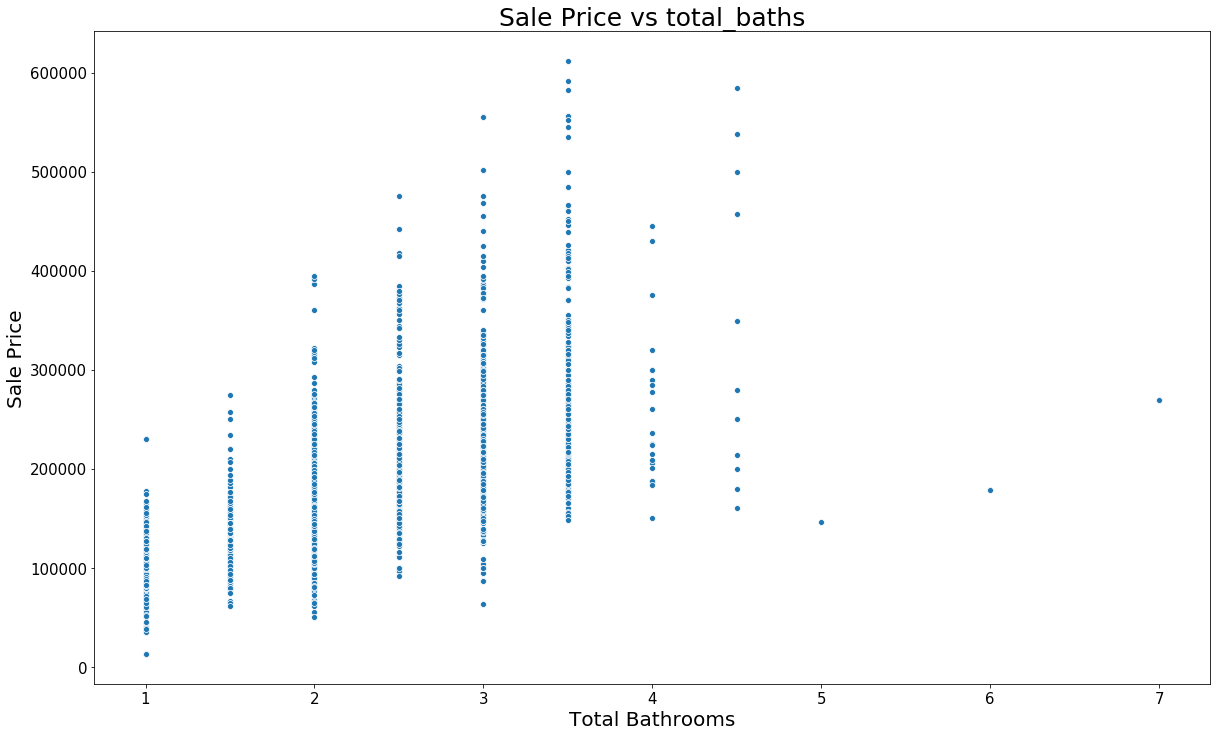

In [32]:
# scatterplot 3
plt.figure(figsize=(20,12))
sns.scatterplot(data=df_train_copy1,x='total_baths',y='saleprice')

plt.title('Sale Price vs total_baths',fontsize=25)
plt.xlabel('Total Bathrooms',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.tick_params(labelsize=15)



Apparently the more bathrooms you have the higher the price you can sell your house. 

## Conclusions and Recommendations


The Lasso Regression Model will be used for the sale price predictions. The model has the lowest RMSE score of 31771  and a R2 score of 0.91.

Property Agent:
Agent can utilize this model to target the top 3 neighborhood in Ames and give a true valuation to home owners. And from the above violinplot it also shows that most property sold in Ames belong to the residential category. Thus, agent can focus their sales on residential property as compared to other categories. And the top 3 neighborhood that are built 1990s onwards will enable them to fetch the highest sale price and therefore, maximum profit.

Recommendation:
More economic data could be given such as the unemployment rate, inflation rate and interest rate. 
More informations on property buyers such as the type of property buyers, age, size of family and nationality. 
The overall population demographics in Ames to get a better understanding of the property buyers pattern. 